# Análise exploratória de dados

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

## 1. Coleta dos dados

In [26]:
# Caminho completo para o arquivo CSV

In [27]:
caminho = "../data/raw/day.csv"

In [28]:
df = pd.read_csv(caminho)

In [29]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
df.shape

(731, 16)

## 2.Descrição dos dados

### 2.1 Dicionario de dados

In [31]:
dicionario_bikes = pd.DataFrame([
    {
        "variavel": "instant",
        "descricao": "Identificador único para cada registro",
        "tipo": "Quantitativa",
        "subtipo": "Discreta"
    },{
        "variavel": "dteday",
        "descricao": "Data do registro",
        "tipo": "Qualitativa",
        "subtipo": "Nominal"
    },{
        "variavel": "season",
        "descricao": "Estação do ano",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal"
    },{
        "variavel": "yr",
        "descricao": "Ano",
        "tipo": "Qualitativa",
        "subtipo": "Nominal"
    },{
        "variavel": "mnth",
        "descricao": "Mês do ano",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal"
    },{
        "variavel": "holiday",
        "descricao": "Indicador de feriado",
        "tipo": "Qualitativa",
        "subtipo": "Nominal"
    },{
        "variavel": "weekday",
        "descricao": "Dia da semana",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal"
    },{
        "variavel": "workingday",
        "descricao": "Indicador de dia útil",
        "tipo": "Qualitativa",
        "subtipo": "Nominal"
    },{
        "variavel": "weathersit",
        "descricao": "Condição meteorológica",
        "tipo": "Qualitativa",
        "subtipo": "Ordinal"
    },{
        "variavel": "temp",
        "descricao": "Temperatura média em Celsius",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "atemp",
        "descricao": "Sensação térmica média em Celsius",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "hum",
        "descricao": "Umidade relativa média",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "windspeed",
        "descricao": "Velocidade média do vento",
        "tipo": "Quantitativa",
        "subtipo": "Contínua"
    },{
        "variavel": "casual",
        "descricao": "Número de aluguéis de bicicletas feitos por clientes casuais",
        "tipo": "Quantitativa",
        "subtipo": "Discreta"
    },{
        "variavel": "registered",
        "descricao": "Número de aluguéis de bicicletas feitos por clientes registrados",
        "tipo": "Quantitativa",
        "subtipo": "Discreta"
    },{
        "variavel": "cnt",
        "descricao": "Total de aluguéis de bicicletas (casual + registrado)",
        "tipo": "Quantitativa",
        "subtipo": "Discreta"
    }
])

dicionario_bikes.to_csv('../data/external/dicionario.csv', index=False)

dicionario_bikes

,variavel,descricao,tipo,subtipo
0,instant,Identificador único para cada registro,Quantitativa,Discreta
1,dteday,Data do registro,Qualitativa,Nominal
2,season,Estação do ano,Qualitativa,Ordinal
3,yr,Ano,Qualitativa,Nominal
4,mnth,Mês do ano,Qualitativa,Ordinal
5,holiday,Indicador de feriado,Qualitativa,Nominal
6,weekday,Dia da semana,Qualitativa,Ordinal
7,workingday,Indicador de dia útil,Qualitativa,Nominal
8,weathersit,Condição meteorológica,Qualitativa,Ordinal
9,temp,Temperatura média em Celsius,Quantitativa,Contínua


No Dataframe são encontradas um total de 731 dias observados contendo 16 variáveis sendo 8 variáveis qualitativas e 8 variáveis quantitativas.

---

## 3. Perguntas de partida e hipóteses

- Existem dados Faltante?
- Existem dados duplicados?
- verificar as distribuições variável por variável.
- verificar as relações das demais variáveis com a variável alvo

---

### 3.1 Análise dos dados Faltantes

In [32]:
valores_nulos_por_coluna = df.isnull().sum()

print(valores_nulos_por_coluna)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Para nosso conjunto de dados não há nenhum valor faltante.

---

### 3.2 Valores duplicados

In [33]:
total_duplicatas = df.duplicated().sum()

print(f"Total de linhas duplicadas: {total_duplicatas}")

Total de linhas duplicadas: 0


Novamente para nosso conjunto de dados não há dados duplicados.

---

### 3.3 Verificando a distribuição de cada variável

In [34]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Insites:
-
-
-
-
-
-

---

### 3.4 Distribuição das variáveis qualitativas

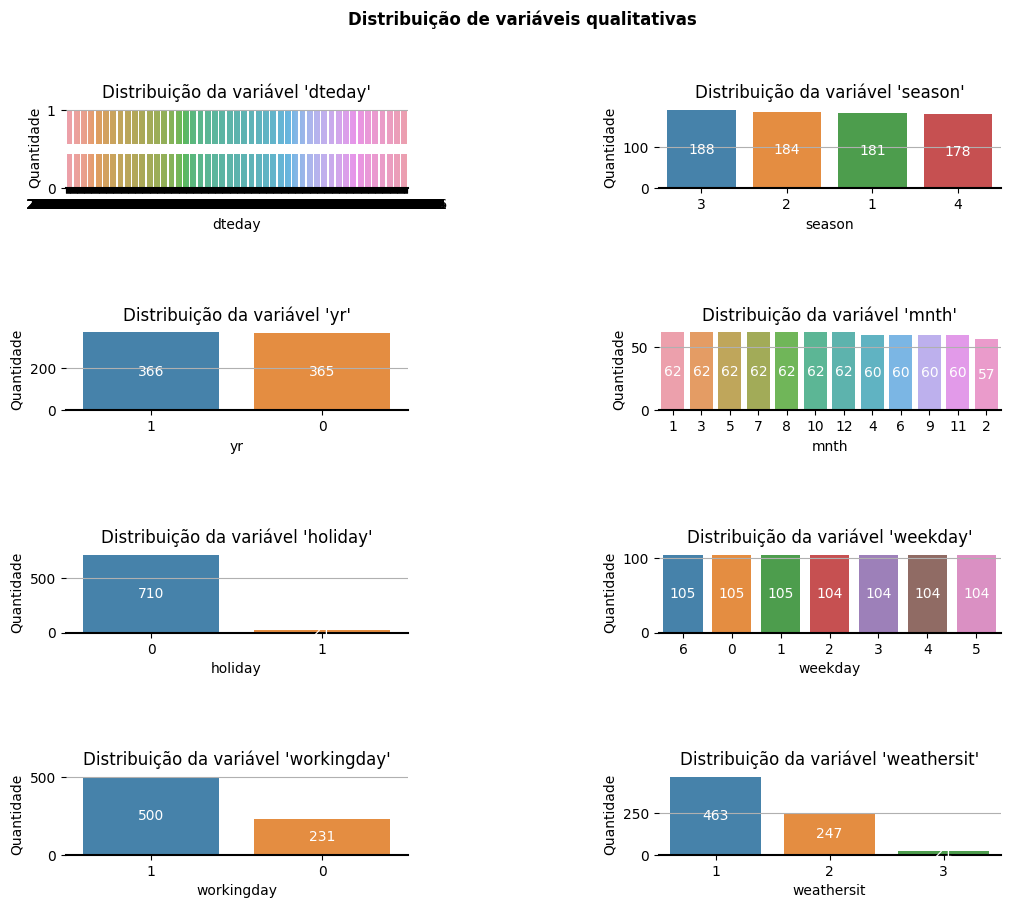

In [35]:
fig, axes = plt.subplots(4, 2, figsize=(12,10))
plt.tight_layout(pad=8, w_pad=15, h_pad=8)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario_bikes.query("tipo == 'Qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

---

### 3.5 Distribuição das variáveis quantitativas

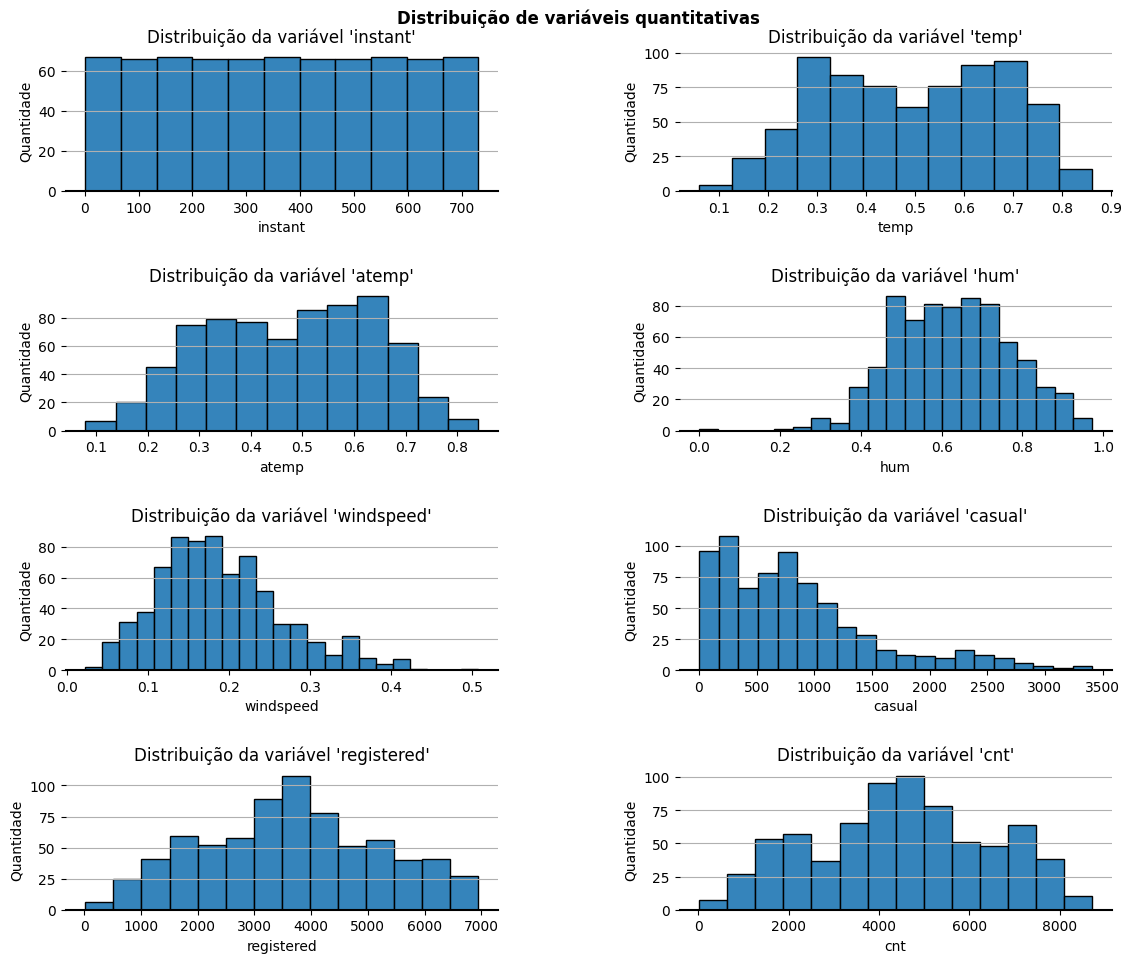

In [36]:
fig, axes = plt.subplots(4, 2, figsize=(12,10))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario_bikes.query("tipo == 'Quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

### 3.6 Relações das variáveis com a variável alvo

In [39]:
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


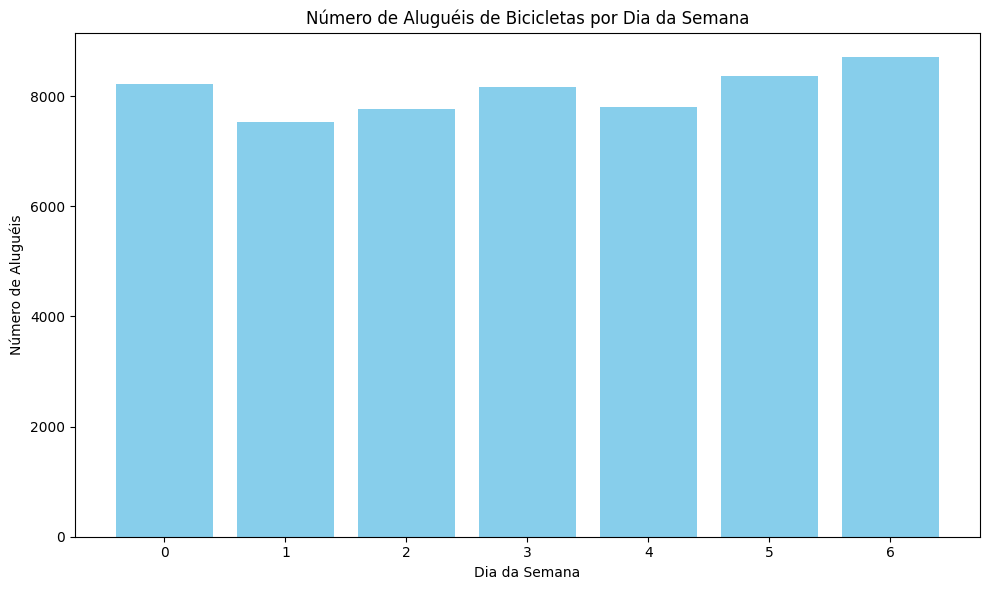

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(df['weekday'], df['cnt'], color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Número de Aluguéis de Bicicletas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Aluguéis')

# Personalizar os rótulos do eixo x para mostrar os nomes dos dias da semana
#nomes_dias_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
#plt.xticks(df["weekday"], nomes_dias_semana, rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# Seus dados
dados = {
    "weekday": [6, 0, 1, 2, 3, 4, 5],  # Exemplo: 0=Domingo, 1=Segunda-feira, ..., 6=Sábado
    "cnt": [100, 200, 300, 400, 500, 600, 700]  # Exemplo: Número de bicicletas alugadas
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Calcular a média do número de bicicletas alugadas para cada dia da semana
media_por_dia = df.groupby("weekday")["cnt"].mean()

# Encontrar o dia da semana com a média mais alta
dia_mais_utilizado = media_por_dia.idxmax()

# Exibir o resultado
print("O dia da semana mais utilizado para andar de bicicleta é:", dia_mais_utilizado)


O dia da semana mais utilizado para andar de bicicleta é: 5


In [20]:
import pandas as pd

# Seus dados
dados = {
    "mnth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Exemplo: 1=Janeiro, 2=Fevereiro, ..., 12=Dezembro
    "cnt": [1000, 1200, 1500, 2000, 2500, 2200, 1800, 1600, 1400, 1300, 1100, 900]  # Exemplo: Número de bicicletas alugadas
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Calcular a média do número de bicicletas alugadas para cada mês
media_por_mes = df.groupby("mnth")["cnt"].mean()

# Encontrar o mês com a média mais alta
mes_mais_utilizado = media_por_mes.idxmax()

# Exibir o resultado
print("O mês mais utilizado para andar de bicicleta é:", mes_mais_utilizado)


O mês mais utilizado para andar de bicicleta é: 5


In [27]:
import pandas as pd

# Seus dados
dados = {
    "bike_id": [1, 2, 1, 3, 1, 2, 1, 4, 5, 4, 1, 2],  # Exemplo: ID da bicicleta
    "cnt": [100, 150, 200, 180, 220, 130, 240, 90, 120, 80, 260, 170]  # Exemplo: Número de bicicletas alugadas
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Calcular quantas vezes cada bicicleta foi alugada
alugueis_por_bicicleta = df.groupby("bike_id")["cnt"].sum()

# Calcular a soma total de aluguéis
total_alugueis = alugueis_por_bicicleta.sum()

# Exibir o resultado
print("Total de aluguéis de bicicletas ao longo do ano:", total_alugueis)


Total de aluguéis de bicicletas ao longo do ano: 1940


In [12]:
import pandas as pd

# Seus dados
dados = {
    "bike_id": [1, 2, 1, 3, 1, 2, 1, 4, 5, 4, 1, 2],  # Exemplo: ID da bicicleta
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Calcular o número de bicicletas ativas no sistema
bicicletas_ativas = df["bike_id"].nunique()

# Exibir o resultado
print("Número de bicicletas ativas no sistema:", bicicletas_ativas)


Número de bicicletas ativas no sistema: 5


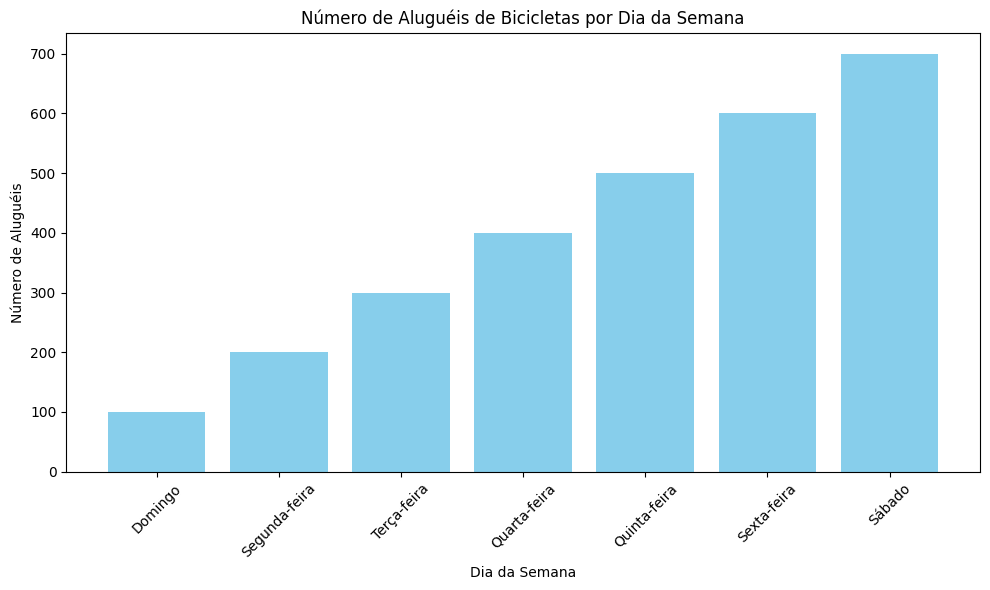

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Seus dados
dados = {
    "weekday": [0, 1, 2, 3, 4, 5, 6],  # Dias da semana (0=Domingo, 1=Segunda-feira, ..., 6=Sábado)
    "cnt": [100, 200, 300, 400, 500, 600, 700]  # Número de bicicletas alugadas para cada dia da semana
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df["weekday"], df["cnt"], color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Número de Aluguéis de Bicicletas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Aluguéis')

# Personalizar os rótulos do eixo x para mostrar os nomes dos dias da semana
nomes_dias_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
plt.xticks(df["weekday"], nomes_dias_semana, rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


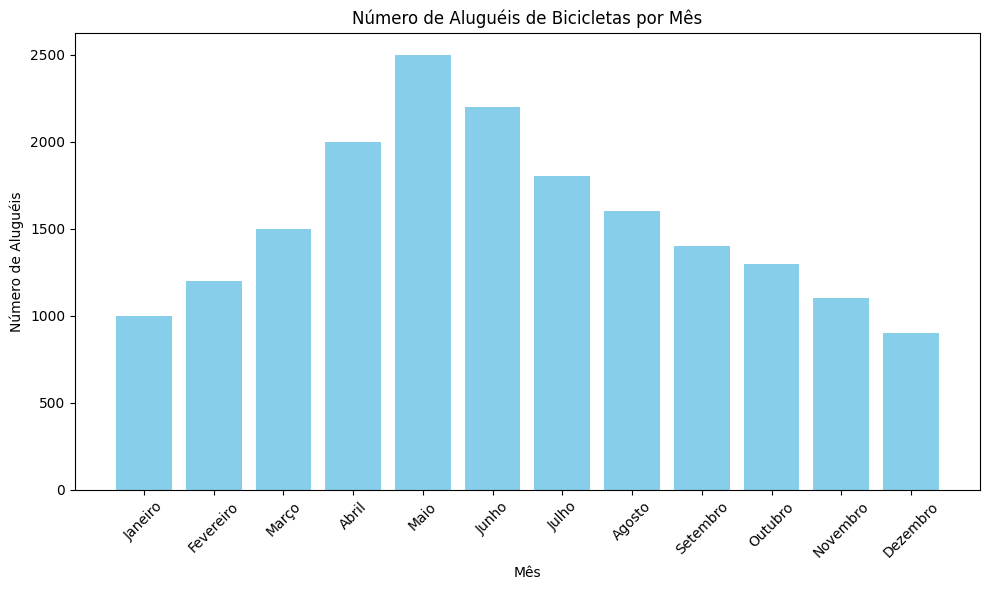

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Seus dados
dados = {
    "mnth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Mês (1=Janeiro, 2=Fevereiro, ..., 12=Dezembro)
    "cnt": [1000, 1200, 1500, 2000, 2500, 2200, 1800, 1600, 1400, 1300, 1100, 900]  # Número de aluguéis de bicicletas para cada mês
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df["mnth"], df["cnt"], color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Número de Aluguéis de Bicicletas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Aluguéis')

# Personalizar os rótulos do eixo x para mostrar o nome dos meses
nomes_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
plt.xticks(df["mnth"], nomes_meses, rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


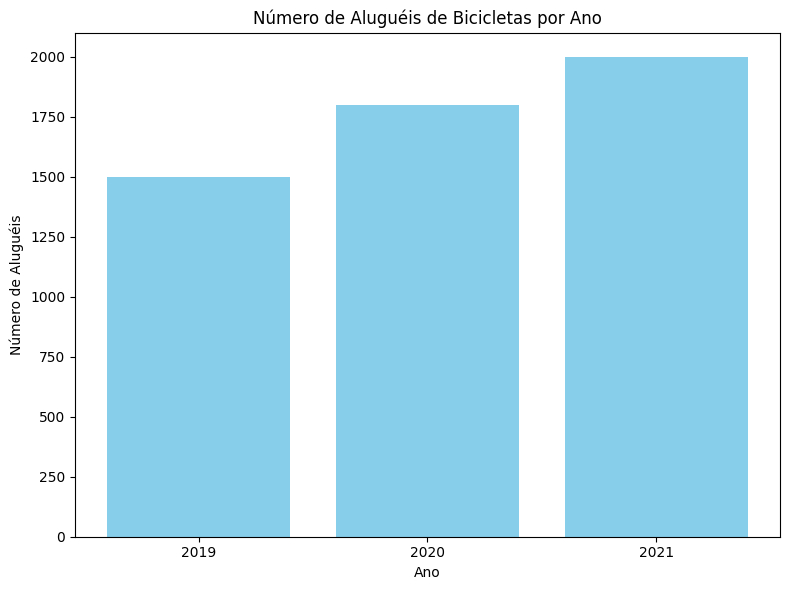

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Seus dados
dados = {
    "ano": [2019, 2020, 2021],  # Anos
    "cnt": [1500, 1800, 2000]  # Número total de aluguéis de bicicletas para cada ano
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df["ano"], df["cnt"], color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Número de Aluguéis de Bicicletas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Aluguéis')

# Definir os ticks do eixo x como inteiros
plt.xticks(df["ano"])

# Mostrar o gráfico
plt.tight_layout()
plt.show()


/tmp/ipykernel_108641/2736763736.py:51: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


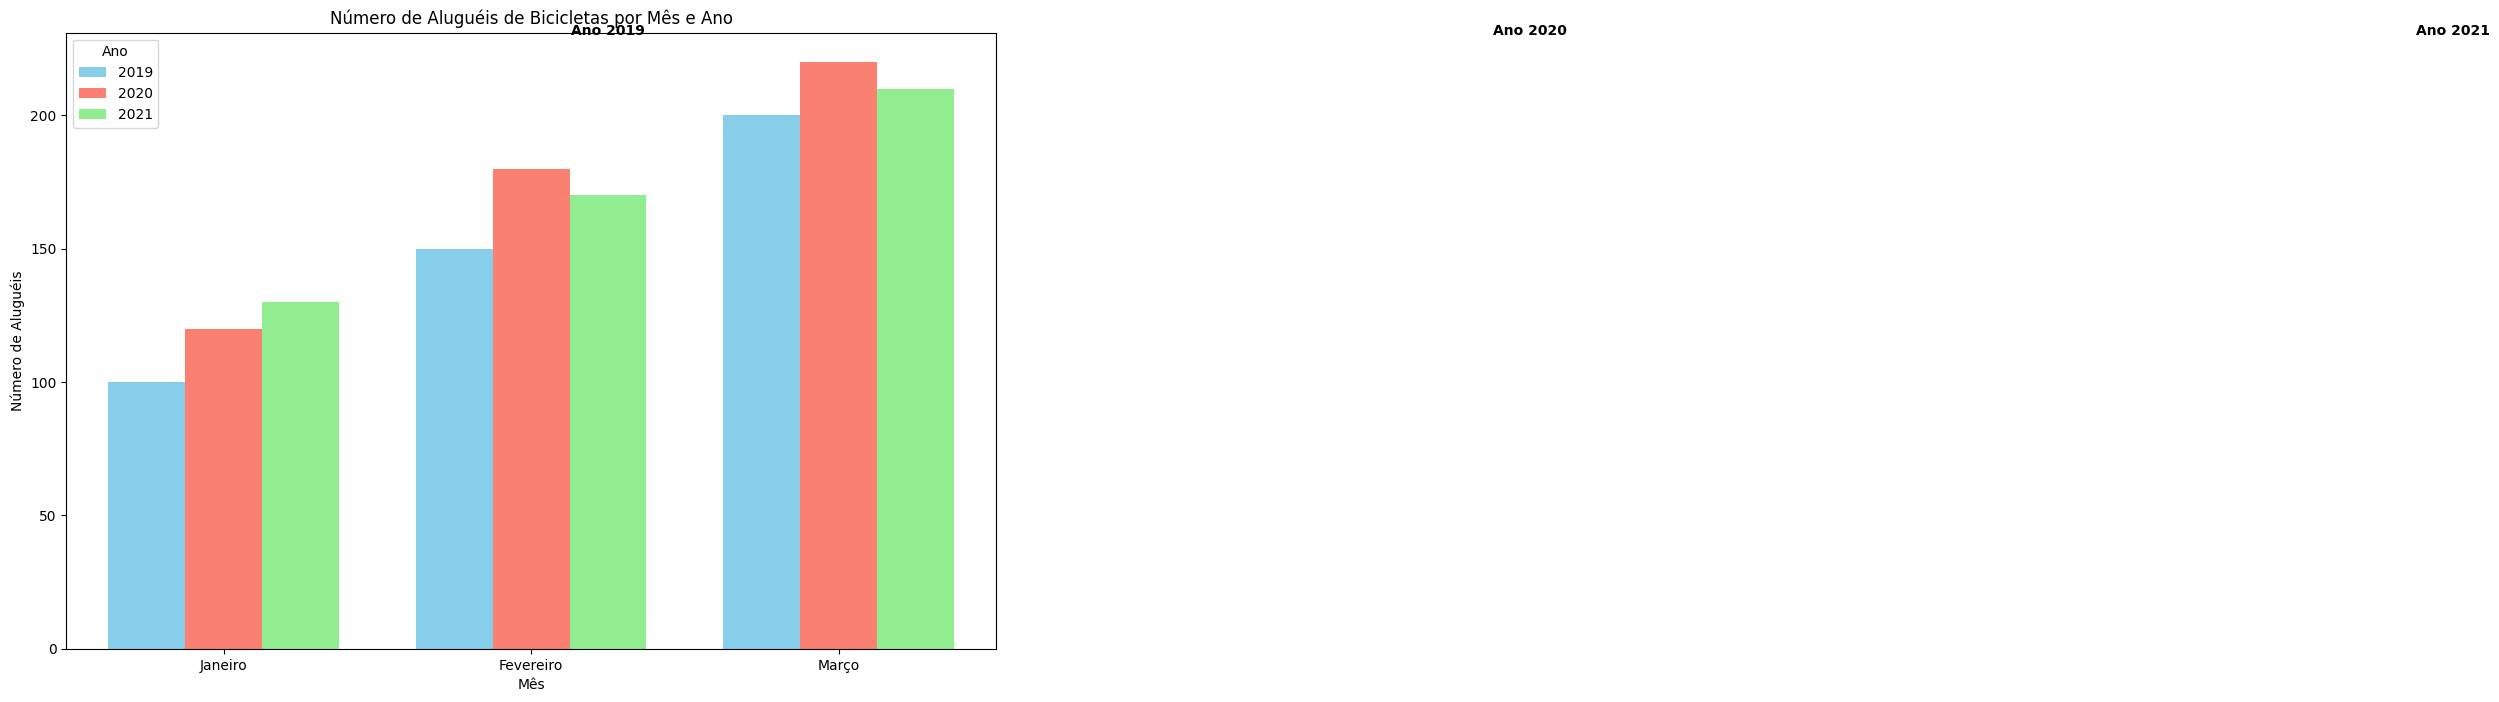

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Seus dados
dados = {
    "ano": [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021],  # Ano
    "mes": [1, 2, 3, 1, 2, 3, 1, 2, 3],  # Mês
    "cnt": [100, 150, 200, 120, 180, 220, 130, 170, 210]  # Número de aluguéis de bicicletas para cada mês
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Mapear números de mês para nomes de mês
nomes_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março'
}

# Substituir números de mês pelos nomes dos meses
df['mes'] = df['mes'].map(nomes_meses)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))

# Definir cores para cada ano
cores = ['skyblue', 'salmon', 'lightgreen']

# Agrupar os dados por ano e mês
for i, (ano, dados_ano) in enumerate(df.groupby("ano")):
    # Definir posição das barras para cada ano
    posicao_barras = [j + i * 0.25 for j in range(len(dados_ano))]
    plt.bar(posicao_barras, dados_ano["cnt"], label=str(ano), color=cores[i], width=0.25)

# Adicionar título e rótulos aos eixos
plt.title('Número de Aluguéis de Bicicletas por Mês e Ano')
plt.xlabel('Mês')
plt.ylabel('Número de Aluguéis')

# Adicionar descrição dos meses
plt.xticks([i + 0.25 for i in range(3)], df["mes"].unique())

# Adicionar legenda
plt.legend(title="Ano", loc="upper left")

# Adicionar descrição dos anos
plt.text(1.5, 230, 'Ano 2019', horizontalalignment='center', fontsize=10, color='black', weight='bold')
plt.text(4.5, 230, 'Ano 2020', horizontalalignment='center', fontsize=10, color='black', weight='bold')
plt.text(7.5, 230, 'Ano 2021', horizontalalignment='center', fontsize=10, color='black', weight='bold')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


/tmp/ipykernel_108641/1594419123.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


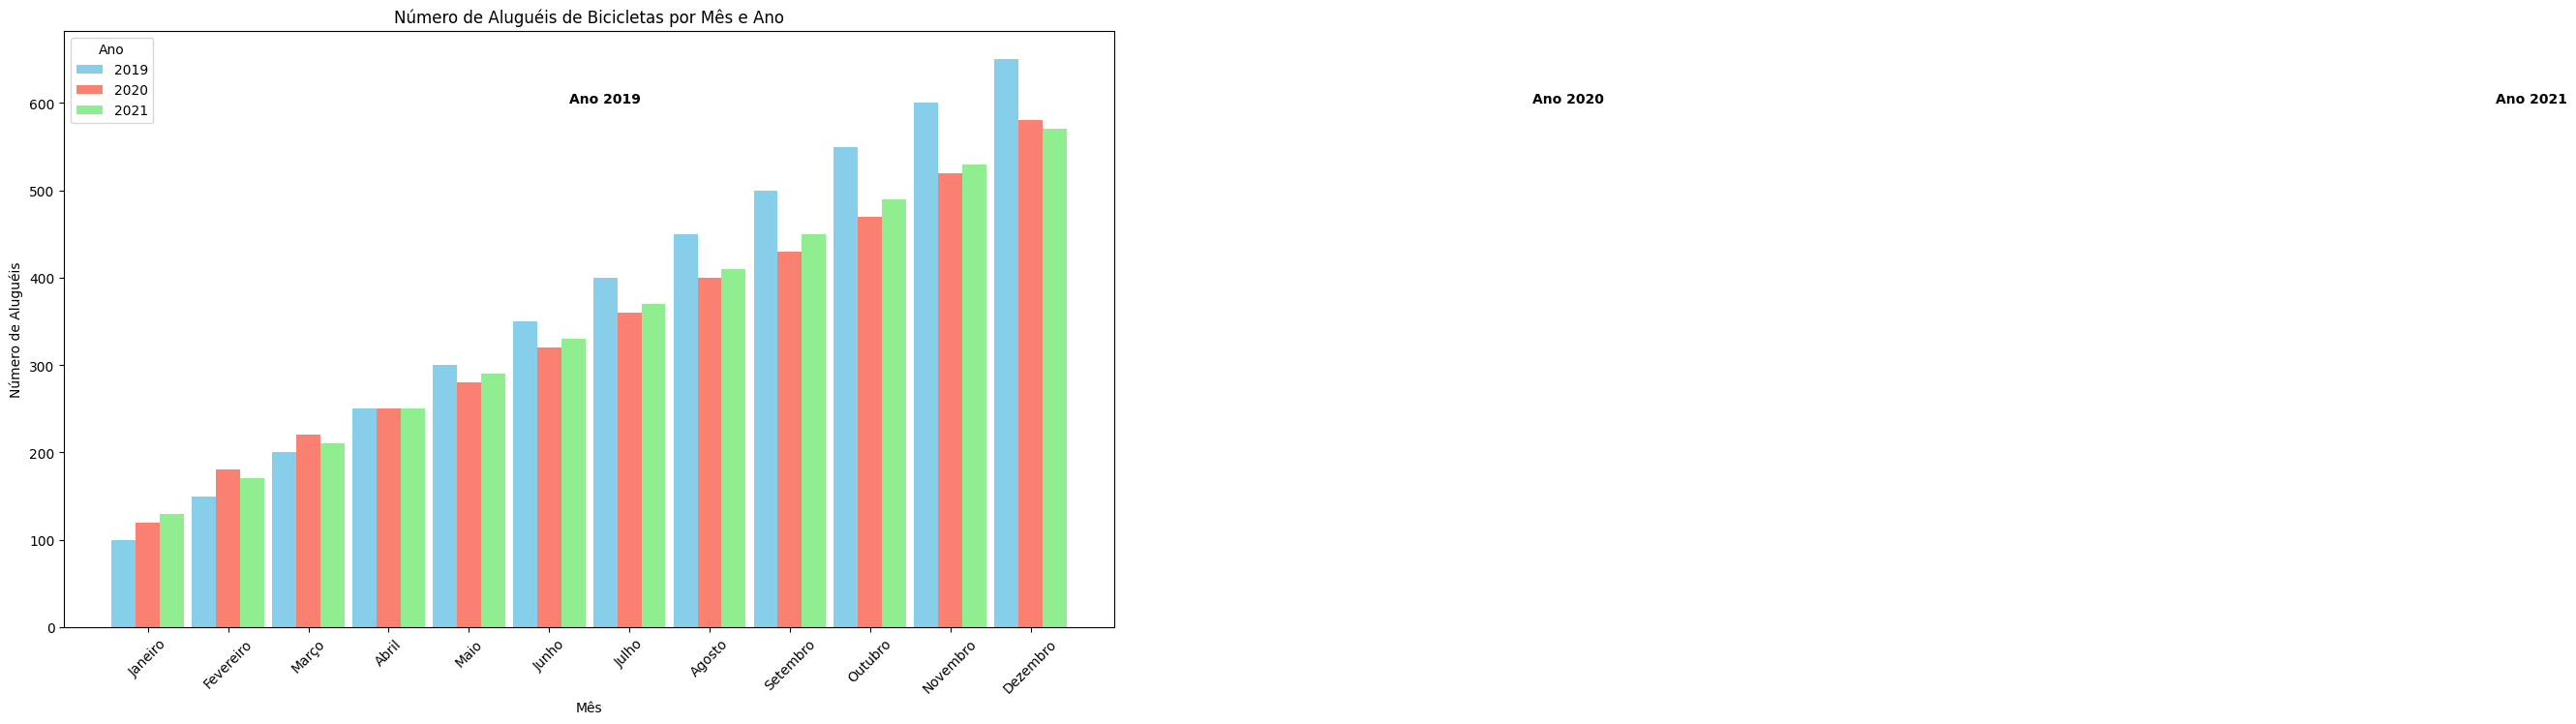

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Seus dados
dados = {
    "ano": [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],  
    "mes": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  
    "cnt": [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
            120, 180, 220, 250, 280, 320, 360, 400, 430, 470, 520, 580,
            130, 170, 210, 250, 290, 330, 370, 410, 450, 490, 530, 570]  
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Mapear números de mês para nomes de mês
nomes_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
    7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# Substituir números de mês pelos nomes dos meses
df['mes'] = df['mes'].map(nomes_meses)

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))

# Definir cores para cada ano
cores = ['skyblue', 'salmon', 'lightgreen']

# Agrupar os dados por ano e mês
for i, (ano, dados_ano) in enumerate(df.groupby("ano")):
    # Definir posição das barras para cada ano
    posicao_barras = [j + i * 0.3 for j in range(len(dados_ano))]
    plt.bar(posicao_barras, dados_ano["cnt"], label=str(ano), color=cores[i], width=0.3)

# Adicionar título e rótulos aos eixos
plt.title('Número de Aluguéis de Bicicletas por Mês e Ano')
plt.xlabel('Mês')
plt.ylabel('Número de Aluguéis')

# Adicionar descrição dos meses
plt.xticks([i + 0.3 for i in range(12)], df["mes"].unique(), rotation=45)

# Adicionar legenda
plt.legend(title="Ano", loc="upper left")

# Adicionar descrição dos anos
plt.text(6, 600, 'Ano 2019', horizontalalignment='center', fontsize=10, color='black', weight='bold')
plt.text(18, 600, 'Ano 2020', horizontalalignment='center', fontsize=10, color='black', weight='bold')
plt.text(30, 600, 'Ano 2021', horizontalalignment='center', fontsize=10, color='black', weight='bold')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Seus dados
dados = {
    "ano": [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021],  # Ano
    "mes": [1, 2, 3, 1, 2, 3, 1, 2, 3],  # Mês
    "cnt": [100, 150, 200, 120, 180, 220, 130, 170, 210]  # Número de aluguéis de bicicletas para cada mês
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Adicionar coluna com a porcentagem de crescimento em relação ao mês anterior
df['crescimento_mensal'] = df.groupby('ano')['cnt'].pct_change() * 100

# Adicionar coluna com a porcentagem de crescimento em relação ao ano anterior
df['crescimento_anual'] = df.groupby('ano')['cnt'].pct_change(periods=12) * 100

# Exibir o DataFrame com as porcentagens de crescimento
print(df)


    ano  mes  cnt  crescimento_mensal  crescimento_anual
0  2019    1  100                 NaN                NaN
1  2019    2  150           50.000000                NaN
2  2019    3  200           33.333333                NaN
3  2020    1  120                 NaN                NaN
4  2020    2  180           50.000000                NaN
5  2020    3  220           22.222222                NaN
6  2021    1  130                 NaN                NaN
7  2021    2  170           30.769231                NaN
8  2021    3  210           23.529412                NaN


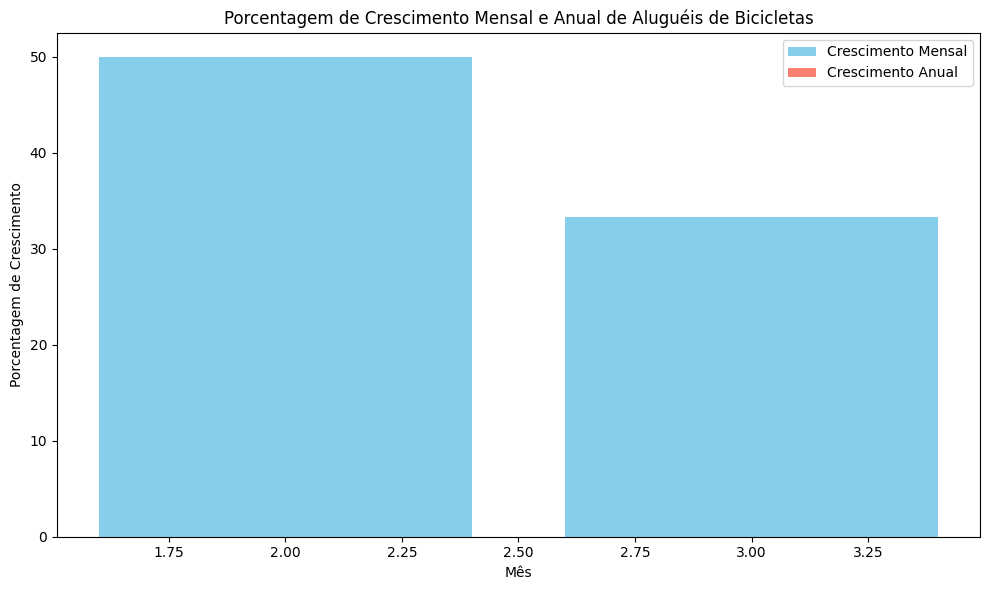

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Seus dados
dados = {
    "ano": [2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021],  # Ano
    "mes": [1, 2, 3, 1, 2, 3, 1, 2, 3],  # Mês
    "cnt": [100, 150, 200, 120, 180, 220, 130, 170, 210]  # Número de aluguéis de bicicletas para cada mês
}

# Converter para DataFrame
df = pd.DataFrame(dados)

# Adicionar coluna com a porcentagem de crescimento em relação ao mês anterior
df['crescimento_mensal'] = df.groupby('ano')['cnt'].pct_change() * 100

# Adicionar coluna com a porcentagem de crescimento em relação ao ano anterior
df['crescimento_anual'] = df.groupby('ano')['cnt'].pct_change(periods=12) * 100

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para porcentagem de crescimento mensal
plt.bar(df['mes'], df['crescimento_mensal'], color='skyblue', label='Crescimento Mensal')

# Gráfico de barras para porcentagem de crescimento anual
plt.bar(df['mes'], df['crescimento_anual'], color='salmon', label='Crescimento Anual')

# Adicionar título e rótulos aos eixos
plt.title('Porcentagem de Crescimento Mensal e Anual de Aluguéis de Bicicletas')
plt.xlabel('Mês')
plt.ylabel('Porcentagem de Crescimento')
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()
